<a href="https://colab.research.google.com/github/wenchun0731/city-hunter/blob/main/%E6%9C%AA%E7%A6%AE%E8%AE%93%E8%A1%8C%E4%BA%BA%E9%81%95%E8%A6%8F%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#掛載雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content')

In [3]:
!sudo apt install tesseract-ocr
!pip install numpy
!pip install pytesseract
!pip install ultralytics
!pip install deep-sort-realtime
!pip install import-ipynb
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow
!pip install opencv-python
!pip install opencv-python-headless
import cv2
import numpy as np
import pytesseract
from google.colab import drive
from google.colab.patches import cv2_imshow
from sklearn.cluster import DBSCAN
import numpy as np
import cv2
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
import plates_identify
import crosswalkconnect

## 連接資料庫

In [5]:
!pip install mysql-connector-python  # MySQL 範例

In [6]:
#import相關套件
import mysql.connector
import pandas.io.sql as sql
import pandas as pd
import pandas as pd
from datetime import datetime

In [7]:
import mysql.connector


#連結到資料庫
config = {
    'user':'113403',
    'password':'@All3403@',
    'host':'140.131.114.242',
    'database':'113-law'
}
cnx=mysql.connector.connect(**config)
cursor = cnx.cursor()
#使用SQL語法讀取資料表
df=sql.read_sql('select * from testapp_car;',cnx)





<ipython-input-7-1047c5645cdd>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=sql.read_sql('select * from testapp_car;',cnx)


# Yolov8

In [8]:
#下載ultralytics開源庫
!pip install ultralytics

In [9]:
#下載YOLOv8並檢查模型配置
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()#清除当前输出单元格的所有输出内容
!yolo model=checks#检查 YOLO 模型的状态或配置信息。

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 897, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 481, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'YOLO' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'model=checks#检查', 'YOLO', '模型的状态或配置信息。']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'detect', 'segment', 'pose', 'obb'}
                MODE (required) is one of {'predict', 'train', 'val', 'track', 'export', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ul

# 主程式

In [10]:
!pip install opencv-python

In [11]:
import cv2


0: 384x640 4 persons, 156.2ms
Speed: 3.4ms preprocess, 156.2ms inference, 1122.4ms postprocess per image at shape (1, 3, 384, 640)
[[423, 1037], [181, 893], [53, 783], [1548, 803], [1330, 732], [1147, 673], [994, 623], [857, 584], [740, 550], [633, 521], [538, 495], [452, 472], [375, 453], [305, 436], [1710, 282]] (0.332, 396.393) (0.236, 299.92)

0: 384x640 4 persons, 45.6ms
Speed: 3.8ms preprocess, 45.6ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 41.5ms
Speed: 4.2ms preprocess, 41.5ms inference, 11.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 108.0ms
Speed: 3.3ms preprocess, 108.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 41.0ms
Speed: 8.3ms preprocess, 41.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 92.4ms
Speed: 10.7ms preprocess, 92.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640

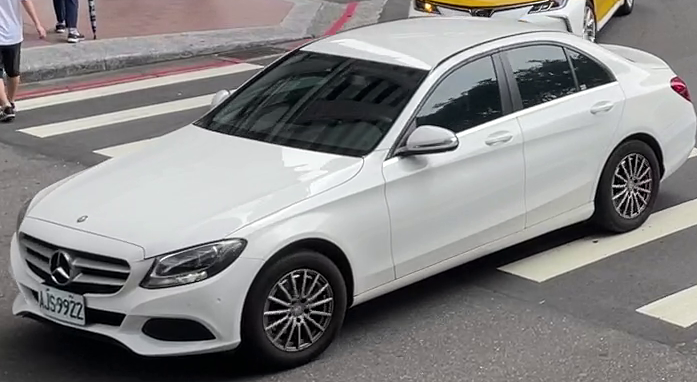

辨識結果:
4899Z2

0: 384x640 3 cars, 1 licence, 2 persons, 45.6ms
Speed: 3.3ms preprocess, 45.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 3 persons, 44.8ms
Speed: 11.1ms preprocess, 44.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 licences, 3 persons, 44.1ms
Speed: 8.6ms preprocess, 44.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 3 persons, 45.3ms
Speed: 10.9ms preprocess, 45.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 2 persons, 44.5ms
Speed: 4.1ms preprocess, 44.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 2 persons, 40.0ms
Speed: 7.3ms preprocess, 40.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 licences, 1 person, 44.0ms
Speed: 4.1ms preprocess, 44.0ms inference, 1.6ms postproces

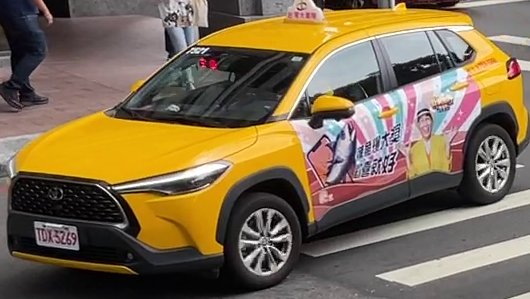

辨識結果:
SZ69

0: 384x640 2 cars, 1 licence, 3 persons, 44.9ms
Speed: 3.3ms preprocess, 44.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 2 persons, 49.0ms
Speed: 3.4ms preprocess, 49.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 2 persons, 40.0ms
Speed: 11.0ms preprocess, 40.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 2 persons, 37.5ms
Speed: 3.2ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 2 persons, 37.5ms
Speed: 3.7ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 2 persons, 42.8ms
Speed: 3.1ms preprocess, 42.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 licence, 2 persons, 37.5ms
Speed: 4.2ms preprocess, 37.5ms inference, 1.8ms postprocess pe

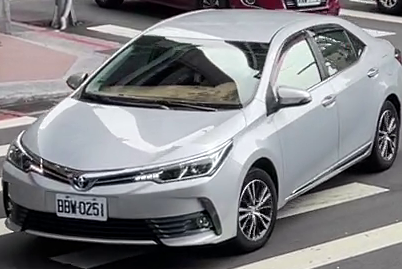

辨識結果:
IBYOZ51

0: 384x640 3 cars, 1 licence, 6 persons, 51.9ms
Speed: 3.4ms preprocess, 51.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 46.7ms
Speed: 8.6ms preprocess, 46.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 45.1ms
Speed: 15.2ms preprocess, 45.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 40.6ms
Speed: 11.2ms preprocess, 40.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 52.5ms
Speed: 3.3ms preprocess, 52.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 45.4ms
Speed: 18.2ms preprocess, 45.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 48.6ms
Speed: 3.5ms preprocess, 48.6ms inference, 1.7ms postproce

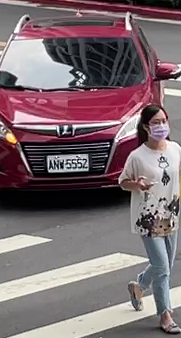

辨識結果:
AN5552

0: 384x640 1 car, 1 licence, 7 persons, 41.2ms
Speed: 7.5ms preprocess, 41.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 licence, 6 persons, 42.3ms
Speed: 3.4ms preprocess, 42.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 licence, 6 persons, 48.9ms
Speed: 4.8ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 licence, 7 persons, 42.7ms
Speed: 3.2ms preprocess, 42.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 licence, 6 persons, 42.0ms
Speed: 5.8ms preprocess, 42.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 licence, 6 persons, 53.1ms
Speed: 3.1ms preprocess, 53.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 6 persons, 43.3ms
Speed: 6.0ms preprocess, 43.3ms inference, 2.4ms postprocess per image at shape (1

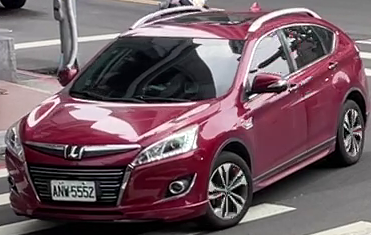


0: 384x640 2 cars, 1 licence, 5 persons, 48.9ms
Speed: 5.8ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 licence, 5 persons, 40.5ms
Speed: 3.7ms preprocess, 40.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 5 persons, 44.3ms
Speed: 8.9ms preprocess, 44.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 6 persons, 40.0ms
Speed: 3.3ms preprocess, 40.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 6 persons, 40.1ms
Speed: 3.5ms preprocess, 40.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 licence, 6 persons, 40.0ms
Speed: 3.4ms preprocess, 40.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 7 persons, 40.9ms
Speed: 3.2ms preprocess, 40.9ms inference, 1.4ms postprocess per image at sha

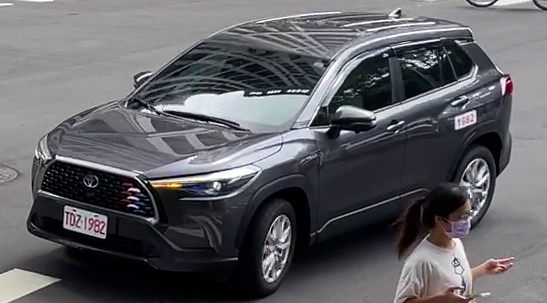

辨識結果:
Z.1982

0: 384x640 3 cars, 1 licence, 6 persons, 42.8ms
Speed: 3.2ms preprocess, 42.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 6 persons, 43.3ms
Speed: 10.2ms preprocess, 43.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 39.9ms
Speed: 10.2ms preprocess, 39.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6 persons, 39.9ms
Speed: 5.8ms preprocess, 39.9ms inference, 11.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6 persons, 40.0ms
Speed: 5.5ms preprocess, 40.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 licence, 6 persons, 43.1ms
Speed: 12.0ms preprocess, 43.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 licence, 6 persons, 41.6ms
Speed: 10.1ms preprocess, 41.6ms inference, 2.1ms postprocess per image at shape

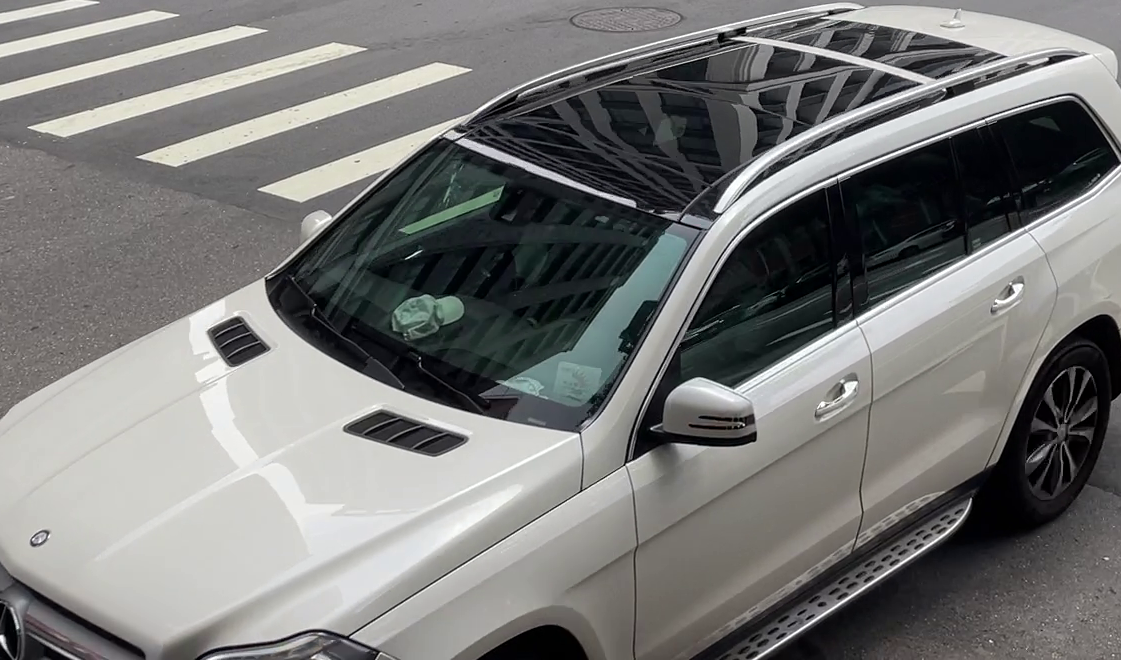


0: 384x640 3 cars, 6 persons, 40.1ms
Speed: 4.4ms preprocess, 40.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6 persons, 40.0ms
Speed: 3.7ms preprocess, 40.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6 persons, 53.5ms
Speed: 13.7ms preprocess, 53.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6 persons, 40.0ms
Speed: 6.3ms preprocess, 40.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 7 persons, 49.5ms
Speed: 13.6ms preprocess, 49.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6 persons, 45.9ms
Speed: 4.8ms preprocess, 45.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6 persons, 51.9ms
Speed: 12.9ms preprocess, 51.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6 persons, 49.4ms
Speed: 11.3ms 

In [12]:
#Deep sort
#DeepSort(使用自己的訓練檔)

import cv2
import math
import copy
import os
import import_ipynb
import sys

import PIL
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

#輸入
model = YOLO('/content/drive/MyDrive/Finetune/Licence_Finetune/train/train/weights/best.pt')
cap = cv2.VideoCapture("/content/drive/MyDrive/Finetune/Licence_Finetune/test_video/IMG_0461.MOV")#輸入影片
fps = cap.get(cv2.CAP_PROP_FPS)
size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fNUMS = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
videoWriter = cv2.VideoWriter("/content/drive/MyDrive/Finetune/Licence_Finetune/detect/predict.mp4", fourcc, fps, size)#輸出位置


#nms_max_overlap非極大值抑制（NMS）過程中允許的最大重疊比例
#nn_budget控制最近鄰搜尋中使用的樣本數量的上限
#min_hits: 設定物體被確認為有效跟蹤需要的最小幀數。增大 min_hits 可以避免追蹤器誤認為是有效的目標，從而減少漂移。
tracker = DeepSort(
    max_age=30,  # 增加此值以保持更長時間的追蹤
    max_cosine_distance=0.8, # 減少此值以提高特徵匹配的精確度一般設置為0到1之間
    nn_budget=100  # 調整最近鄰搜尋的樣本數量
)

# 定義顏色字典
colors = {
    'ambulance':(0,255,0),   # 綠色
    'bus': (0,130,255),     # 青色
    'car': (0,255,0),      # 藍色
    'fire truck': (255,0,0),  # 紅色
    'licence': (60,0,128),   # 紫色
    'person': (255,255,0),   # 黃色
    'police': (0,0,0),     # 黑色
    'traffic light': (255,0,255) # 粉紅色
}
rule_id=[]
violation_frame_count=[]
rule_plates=[]
class TrafficViolationDetector:
    def __init__(self, image_data, up_information, low_information, frame_count, frame, image_data_copy, point_all):
        self.image_data = image_data
        self.image_data_copy=image_data_copy
        self.frame = frame
        self.up_information = up_information
        self.low_information = low_information
        self.frame_count=frame_count
        self.point_all=point_all

    def detect_violations(self):
        return self.data_sort()


    def data_sort(self):
      if 'person' in self.image_data and 'car' in self.image_data:
          for tag, data in self.image_data.items():
              if tag=='car' or tag=='person':

                for data_k, data_v in data.items():
                    # 確保 data_v 是列表而不是字符串
                    if isinstance(data_v, list):
                        for id, coordinate in enumerate(data_v):
                            # 檢查是否為有效的坐標
                            if len(coordinate) >= 2 and self.on_crosswalk(coordinate[0], coordinate[1]):
                                data_v[id] = coordinate
                            else:
                                data_v[id] = []
                        # 過濾空陣列
                        self.image_data[tag][data_k] = [item for item in data_v if item]
          return self.rule_judge()



    def on_crosswalk(self,x,y):
        # 分別提取 x 和 y 值
        x_values = [point[0] for point in self.point_all]
        y_values = [point[1] for point in self.point_all]

        # 計算最小值與最大值
        x_min = min(x_values)
        x_max = max(x_values)
        y_min = min(y_values)
        y_max = max(y_values)
        if x_min <= x <= x_max and y_min <= y <= y_max:
          up_slope=self.up_information[0]
          up_intercept=self.up_information[1]
          low_slope=self.low_information[0]
          low_intercept=self.low_information[1]

          low_y = low_slope * x + low_intercept
          up_y = up_slope * x + up_intercept
          return up_y > y > low_y
        else:
          return False

    def rule_judge(self):
        people_data = self.image_data['person']
        car_data = self.image_data['car']

        for c_k, c_v in car_data.items():

            is_violation = False
            for p_v in people_data.values():

                if is_violation:
                    break
                for c_data, p_data in [[c, p] for c in c_v for p in p_v]:

                    if self.distance_cal(c_data, p_data):
                        is_violation = True
                        violate_information=self.you_violation(c_k)
                        return violate_information


    def distance_cal(self, car, person):
        point_all_copy=copy.deepcopy(self.point_all)
        point_all_copy.append(car)
        point_all_copy.append(person)

        sorted_point_all = sorted(point_all_copy, key=lambda x: x[0])
        car_index=sorted_point_all.index(car)
        person_index=sorted_point_all.index(person)

        return abs(car_index-person_index) <= 3

    def you_violation(self, id):
        if id not in rule_id:

            violation_frame_count.append(self.frame_count)
            #找到違規車輛的車牌是多少的函示
            plates_id=self.find_plates(id)
            if plates_id == None:
              return None
            else:
              rule_id.append(id)
              # rule_plates.append(plates_id)
              car_img_croppped,plates_img_cropped=self.load_on_database(id,plates_id)
              return [self.frame_count,car_img_croppped,plates_img_cropped]
            # print(f'在第{self.frame_count}偵的時候，車輛{id}違規,他的車牌id是{plates_id}')
            # self.clear_list(self.image_data)

    # # 定義清空列表的函式
    # def clear_list(self,lst):
    #     lst.clear()  # 使用 clear() 方法清空列表

    def coor_min_max(self,what_coor):
        min_value = min(min(sublist) for sublist in what_coor)
        max_value = max(max(sublist) for sublist in what_coor)
        return min_value,max_value
    def find_plates(self,id):
        #從image_data['car'][id]找到車輛座標
        rule_car_coordinate=self.image_data['car'][id]
        if 'licence' in self.image_data:
          rule_plates_coordinate=self.image_data['licence']



          all_distance=[]
          car_min,car_max=self.coor_min_max(rule_car_coordinate)
          for plates_id,plates_coordinates in rule_plates_coordinate.items():
            plates_min,plates_max=self.coor_min_max(plates_coordinates)
            x_minus = abs(plates_min - car_min)
            y_minus = abs(plates_max - car_max)
            if y_minus == 0:
                distance = x_minus

            elif x_minus == 0:
                distance = y_minus
            else:
                distance = math.hypot(x_minus, y_minus)
            all_distance.append([plates_id,distance])
          cars_plates_id = min(all_distance, key=lambda x: x[1])
          return cars_plates_id[0]
        else:

          return None

    def load_on_database(self,id,plates_id):
        car_cropped_img=self.img_cropped('car',id)
        plate_cropped_img=self.img_cropped('licence',plates_id)

        # _, car_img_encoded = cv2.imencode('.jpg', car_cropped_img)
        # _, plate_img_encoded = cv2.imencode('.jpg', plate_cropped_img)

        # return car_img_encoded.tobytes(), plate_img_encoded.tobytes()
        return car_cropped_img, plate_cropped_img

    def img_cropped(self,object,coorid):
        object_coordinate=self.image_data_copy[object][coorid]

        # 找到 x 和 y 的最小最大值
        x_min = min(point[0] for point in object_coordinate)  # 找到最小的 x 值
        x_max = max(point[0] for point in object_coordinate)  # 找到最大的 x 值
        y_min = min(point[1] for point in object_coordinate)  # 找到最小的 y 值
        y_max = max(point[1] for point in object_coordinate)  # 找到最大的 y 值
        # print(object_coordinate)
        # 直接裁剪图像（矩形）
        cropped_img = self.frame[y_min:y_max, x_min:x_max]
        return cropped_img




# class plates_OCR:
#   def __init__(self,image):
#     self.image=image

#   def main(self):
#     photo_resize = self.photo_resize(self.image, 320, 136)
#     self.adj_img = self.adjusted(photo_resize, -1.5, 15)
#     gray_img = cv2.cvtColor(self.adj_img, cv2.COLOR_BGR2GRAY)
#     Sobelx = self.Sobel(gray_img)
#     blur_img = self.Gussian(Sobelx)
#     binary = self.threshold(blur_img)
#     min_x, max_x = self.contours(binary)

#     if min_x == float('inf') or max_x == 0:
#       print("無法識別車牌範圍")
#       return

#     cropped_img = self.cropped(binary, min_x, 0, binary.shape[0], max_x)
#     ero_img = self.erope(cropped_img)
#     dilate_img = self.dilate(ero_img)
#     bottom_left, top_left, bottom_right, top_right = self.findcontour(dilate_img)

#     if np.all(bottom_left == 0):
#       print("未找到輪廓")
#       return

#     self.adj_img = self.cropped(self.adj_img, min_x, 0, self.adj_img.shape[0], max_x)
#     self.affine(self.adj_img, bottom_left, top_left, bottom_right, top_right)
#     self.bg('output.jpg')
#     text = self.tesseracttt('output.jpg')

#     return text


#   def photo_resize(self,img,target_width,target_height):
#     # 調整圖片大小
#     re_img=cv2.resize(img, (target_width, target_height))
#     return re_img
#   #調整亮度與對比度
#   def adjusted(self,img,x,y):
#     alpha = x
#     beta = y

#     adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

#     return adjusted_image

#   def Sobel(self,img):
#     Sobelx=cv2.Sobel(img,cv2.CV_32F,1,0)
#     Sobelx=cv2.convertScaleAbs(Sobelx)
#     return Sobelx

#   def Gussian(self,img):
#     kernel_size = (5, 5)  # 高斯和大小 通常奇數
#     sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
#     # 高斯濾波器
#     blurred_img = cv2.GaussianBlur(img, kernel_size, sigma_x)
#     return blurred_img
#   def threshold(self,img):
#     thr, binary = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
#     return binary
#   def contours(self,img):
#     contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
#     contours = contours1[0]   #取得輪廓
#     # cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
#     letters=[]
#     for contour in contours:
#       x,y,w,h=cv2.boundingRect(contour)
#       if 15<h<85: #要改的參數!!!10<h<100
#         letters.append(contour)
#     # cv2.drawContours(contours_img, letters, -1, (255, 0, 0), 2)
#     # cv2_imshow(contours_img)
#     #找出最小x跟最大x
#     min_x =float('inf')#正無窮
#     max_x =0
#     for letter in letters:
#       for point in letter:
#         x=point[0][0]
#         min_x=min(min_x,x)
#         max_x=max(max_x,x)
#     return min_x,max_x
#   #image[y:h,x:w]
#   def cropped(self,img,x,y,h,w):
#     cropped_img=img[y:h,x:w]

#     return cropped_img

#   def erope(self,img):
#     kernel=np.ones((3, 3),np.uint8)
#     ero=cv2.erode(img,kernel,iterations=1)
#     return ero

#   def dilate(self,img):
#     kernel=np.ones((2, 5),np.uint8)
#     dilation=cv2.dilate(img,kernel,iterations=8)
#     return dilation


#   def findcontour(self, img):
#       contours1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #尋找輪廓
#       contours = contours1[0]   #取得輪廓
#       points = None
#       min_contour_length = 2500

#       for contour in contours:
#           area = cv2.contourArea(contour)

#           if area >= min_contour_length:
#               rect = cv2.minAreaRect(contour)
#               angle = rect[2]
#               points = cv2.boxPoints(rect)
#               points = np.int0(points)
#               break

#       if points is not None:
#           sorted_points = sorted(points, key=lambda x: x[0])
#           bottom_left = sorted_points[0]
#           top_left = sorted_points[1]
#           bottom_right = sorted_points[2]
#           top_right = sorted_points[3]

#           return bottom_left, top_left, bottom_right, top_right
#       else:
#           return np.array([0, 0]), np.array([0, 0]), np.array([0, 0]), np.array([0, 0])

#   def affine(self,img,bottom_left,top_left,bottom_right,top_right):
#     p1 = np.float32([(top_left),(top_right),(bottom_right)])
#     p2 = np.float32([[top_left[0],top_right[1]],(top_right),(bottom_right)])
#     M = cv2.getAffineTransform(p1, p2)

#     h,w=self.adj_img.shape[:2]

#     output = cv2.warpAffine(self.adj_img, M,(w,h))

#     x=0
#     y=min(top_right[1],bottom_right[1])
#     h=abs(bottom_right[1]-top_right[1])

#     output=output[y-5:y+h,x:x+w]
#     # output=adjusted(output,-1.5,15)
#     # output=adjusted(output,-1.3,12)
#     # output=adjusted(output,-1.5,15)
#     output=self.adjusted(output,-1.2,13)
#     if output is not None:
#       # output = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
#       # thr, output = cv2.threshold(output,127, 255, cv2.THRESH_BINARY)
#       cv2.imwrite('output.jpg',output)
#     else:
#       print('None')
#       pass

#   def bg(self,img):
#     image=cv2.imread(img)
#     height,width=image.shape[:2]
#     new_height=height+36
#     new_width=width+36
#     x_offset=18
#     y_offset=18
#     #創建一個白色背景圖像
#     background = np.ones((new_height, new_width, 3), dtype=np.uint8) * 255
#     background[y_offset:y_offset+height,x_offset:x_offset+width]=image
#     cv2.imwrite('output.jpg',background)

#   def tesseracttt(self,img):

#     config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789. --oem 3 --psm 6'
#     text = pytesseract.image_to_string(img,lang='eng',config=config)

#     if len(text) ==1:
#       return None
#       print('辨識失敗')
#     else:
#       clean_text = text.strip()#去除兩端不可見字符
#       print('辨識結果:\n{}'.format(clean_text))
#       # img=cv2.imread(img)
#       # cv2.putText(img, clean_text, (int(110), int(70)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
#       # cv2_imshow(img)
#       return text

#＃＃ 計數器
frame_count = 0

# 儲存追蹤框位置的字典
image_data = {}

def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    #int(box[0]): 左邊界的 x 坐標，即框的左側位置（水平坐標）。
    #int(box[1]): 上邊界的 y 坐標，即框的上側位置（垂直坐標）。
    #int(box[2]): 右邊界的 x 坐標，即框的右側位置（水平坐標）。
    #int(box[3]): 下邊界的 y 坐標，即框的下側位置（垂直坐標）。
    p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

    # 畫出矩形框
    cv2.rectangle(image, p1, p2, color, thickness=3, lineType=cv2.LINE_AA)
    if label:
        w, h = cv2.getTextSize(label, 0, fontScale=2 / 3, thickness=3)[0]
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)
        cv2.putText(image,
                    label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                    0, 2/3, txt_color, thickness=3, lineType=cv2.LINE_AA)



while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    draw_frame=frame.copy()

    if success:

        results = model(frame, conf=0.2, iou=0.3)#置信值
        outputs = results[0].boxes.data.cpu().numpy()

        detections = []

        if outputs is not None:
            for output in outputs:
                x1, y1, x2, y2 = list(map(int, output[:4]))
                class_id = int(output[5])

                # 根據模型的類別對應，將class_id對應到具體的類別名稱
                if class_id == 0:
                    label = 'ambulance'
                elif class_id == 1:
                    label = 'bus'
                elif class_id == 2:
                    label = 'car'
                elif class_id == 3:
                    label = 'fire truck'
                elif class_id == 4:
                    label = 'licence'
                elif class_id == 5:
                    label = 'person'
                elif class_id == 6:
                    label = 'police'
                elif class_id == 7:
                    label = 'traffic light'

                color = colors.get(label, (128, 128, 128))  # 默認顏色

                detections.append(([x1, y1, int(x2-x1), int(y2-y1)], output[4], label))

            tracks = tracker.update_tracks(detections, frame=frame)

            for track in tracks:
                if not track.is_confirmed():
                    continue

                track_id = track.track_id #追蹤框id
                bbox = track.to_ltrb()

                # 獲取對應的顏色
                label = track.det_class
                if track_id in rule_id:
                  color = (0,0,255)
                  tickness=5

                else:
                  color = colors.get(label, (128, 128, 128))  # 默認顏色
                  tickness=2

                box_label(draw_frame, bbox, '#' + str(int(track_id)) + label, color)

                # 儲存追蹤框位置
                if frame_count % 10 == 0:

                  # 將角點格式化為所需的字串格式
                  p1 = [int(bbox[0]), int(bbox[1])]  # 左上角
                  p2 = [int(bbox[2]), int(bbox[3])]  # 右下角
                  image_position =  [
                        [p1[0], p1[1]],  # 左上角
                        [p1[0], p2[1]],  # 左下角
                        [p2[0], p2[1]],  # 右下角
                        [p2[0], p1[1]]   # 右上角
                    ]


                  # 檢查是否存在此label
                  if label not in image_data:
                    image_data[label] = {}  # 如果沒有此label，則新增一個字典

                  # 檢查此label下是否存在此track_id
                  if track_id not in image_data[label]:
                    image_data[label][track_id] = image_position


            image_data_copy = copy.deepcopy(image_data)
                  # rule_id = []
            if frame_count == 0:
                  crossWalkIdentify=crosswalkconnect.identify_crosswalk(frame)
                  point_all,up_information,low_information=crossWalkIdentify.main_crosswalk()
                  print(point_all,up_information,low_information)


            if frame_count % 10 == 0:


                  detector = TrafficViolationDetector(image_data, up_information, low_information, frame_count, frame, image_data_copy, point_all)
                  violate_result=detector.detect_violations()
                  if violate_result is not None:
                    # 上傳照片到 Colab
                    # 獲取當前時間並格式化
                    print('違規')
                    cv2_imshow(violate_result[1])
                    seconds = round(violate_result[0] / 60 , 2)
                    _, car_img_encoded = cv2.imencode('.jpg', violate_result[1])
                    _, plate_img_encoded = cv2.imencode('.jpg', violate_result[2])
                    car_image_data = car_img_encoded.tobytes()
                    plate_image_data = plate_img_encoded.tobytes()



                    image=violate_result[2]
                    resule=plates_identify.plates_OCR(image)

                    text=resule.main()
                    if text==None:
                      text=0

                    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

                    data = {
                        'license_plate': [text],
                        'date_time': [current_time],  # 使用當下時間
                        'location': ['TAIPEI'],
                        'violation': ['未禮讓行人'],  # 填闖紅燈或未禮讓行人
                        'seconds': [seconds],  # 違規當下的秒數
                        'car_image': [car_image_data],
                        'plate_image': [plate_image_data]
                    }

                    # 建立 DataFrame
                    df = pd.DataFrame(data)
                    # SQL插入语句
                    add_violation = ("INSERT INTO testapp_car "
                                    "(license_plate, date_time, location, violation, seconds, car_image, plate_image) "
                                    "VALUES (%s, %s, %s, %s, %s, %s, %s)")

                    # 将DataFrame中的每一行数据插入到数据库中
                    for index, row in df.iterrows():
                        data_violation = (row['license_plate'], row['date_time'], row['location'], row['violation'], row['seconds'], row['car_image'], row['plate_image'])
                        cursor.execute(add_violation, data_violation)

                    # 提交事务
                    cnx.commit()







            #  清空字典
            image_data.clear()
            image_data_copy.clear()


        cv2.putText(draw_frame, "https://blog.csdn.net/zhaocj", (25, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        videoWriter.write(draw_frame)
        frame_count += 1  # 每幀加1

    else:
        break
cursor.close()
cnx.close()
cap.release()
videoWriter.release()
# cv2.destroyAllWindows()